In [1]:
import pandas as pd                     #import necessary library
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Height-Weight Data.csv')    #read csv dataset

In [3]:
df.head()     #show some data from dataset

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.shape # here row=3501, column=2

(3501, 2)

Text(0.5, 1.0, 'Height Weight Table')

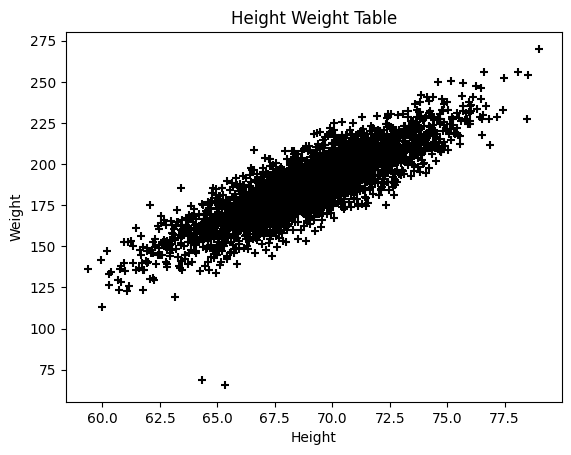

In [5]:
plt.scatter(df.Height, df.Weight, color='black', marker='+')  # data visualization Height, Weight
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height Weight Table')   

In [6]:
x = df.drop('Weight', axis=1) # drop Weight Coloumn, here x = Height
y = df[['Weight']] # here y = Weight 

In [7]:
x.head() # show Height data

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [8]:
y.head() # show Weight data

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [9]:
y.mean() # Show weight data mean value

Weight    186.891258
dtype: float64

In [10]:
x.mean() # show height data mean value

Height    69.024411
dtype: float64

In [11]:
from sklearn.model_selection import train_test_split 

In [12]:
train, test = train_test_split(df, test_size=.25)  # here data training and testing session. testing data size 25%

In [13]:
train.shape # here train data row=2625, column=2

(2625, 2)

In [14]:
test.shape  # here testing data row=876, column=2

(876, 2)

In [15]:
train.head() #show train data

,Height,Weight
1134,62.921949,144.170644
3431,70.094935,196.639266
3087,70.196920,214.004438
1704,68.213144,168.168504
2123,68.414865,188.997023


In [16]:
test.head() #show test data

,Height,Weight
1983,70.465663,182.802806
1174,67.277198,176.308720
1301,70.490521,208.764897
2873,61.136475,125.827022
616,69.726885,188.453760


In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25, random_state=0) #randomly data testing and training, testing size 25%

In [18]:
xtrain.head() #show Height  training data

,Height
1310,67.847749
3153,65.215556
3333,63.873409
1002,69.156982
1765,68.503261


In [19]:
xtest.head() #show Height testing data

,Height
1269,72.165757
118,67.738963
2810,71.359472
2621,68.074623
1535,66.854111


In [20]:
ytrain.head() #show Weight training data

,Weight
1310,153.031321
3153,174.931143
3333,152.554620
1002,206.515190
1765,193.982059


In [21]:
ytest.head() #show Weight testing data

,Weight
1269,204.577436
118,178.170556
2810,197.472656
2621,171.695510
1535,180.544377


In [22]:
from sklearn.linear_model import LinearRegression 

In [23]:
lr = LinearRegression() # Y = MX + C

In [24]:
lr.fit(xtrain, ytrain) # fit testing and training data on LinearRegression model

LinearRegression()

In [25]:
m = lr.coef_  # evaluate coefficient/slope M
m

array([[5.96613032]])

In [26]:
c = lr.intercept_   # evaluate intercept C
c

array([-224.98706384])

In [27]:
yp = (m*73.84702)+c  # Weight prediction through y=mx+c equation
yp

array([[215.59388139]])

In [28]:
yp = (m*65.95958)+c  # Weight prediction through y=mx+c equation
yp

array([[168.53638644]])

In [29]:
lr.predict([[65.95958]])  #Weight prediction through LinearRegression Model

C:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[168.53638644]])

In [30]:
df['Predicted_Weight'] = lr.predict(x)  # Create Predicted_Weight coloumn
df.head()

,Height,Weight,Predicted_Weight
0,73.847017,241.893563,215.593864
1,68.781904,162.310473,185.374740
2,74.110105,212.740856,217.163483
3,71.730978,220.042470,202.969301
4,69.881796,206.349801,191.936837


In [31]:
df.head()  # show dataset

,Height,Weight,Predicted_Weight
0,73.847017,241.893563,215.593864
1,68.781904,162.310473,185.374740
2,74.110105,212.740856,217.163483
3,71.730978,220.042470,202.969301
4,69.881796,206.349801,191.936837


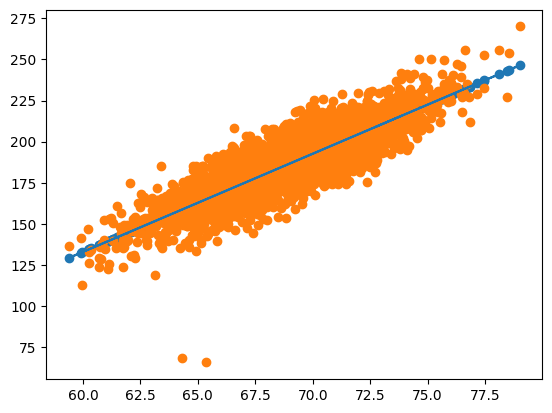

In [32]:
plt.plot(x, df[['Predicted_Weight']])          # data visualization Weight and Predicted_Weight
plt.scatter(x, df[['Predicted_Weight']])
plt.scatter(x, df[['Weight']])

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:
mse = mean_squared_error(ytest, lr.predict(xtest)) #evaluate MSE and MAE
mae = mean_absolute_error(ytest, lr.predict(xtest))

In [35]:
mae # show MSE

8.145588569833935

In [36]:
mse # show MAE

103.7087557410597

In [37]:
lr.score(xtest, ytest) # show success rate of prediction

0.7400625947962998

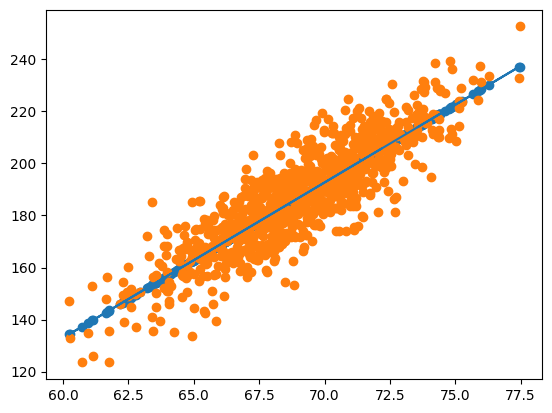

In [38]:
plt.plot(xtest, lr.predict(xtest))
# plt.plot(x.squeeze(), df[['predicted_rent']])         #data visualization with testing height and weight data
plt.scatter(xtest, lr.predict(xtest))
# plt.scatter(x, df[['rent']])
plt.scatter(xtest, ytest)